In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Import Data 

In [3]:
track_df=pd.read_csv("tracks_features.csv")
print(track_df.columns)
track_df.head(100)

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.026100,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.012900,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.023400,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.163000,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.001620,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4VJE2QEGdEYa1I6sqbqC0r,Get Back,Waste Of Mind,7bYhJeHWcA2fQcrdLEI5gJ,['zebrahead'],['6SiyKSeJo6gcsS2NvuAbsl'],2,1,False,0.633,...,0.0553,0.002060,0.000036,0.0689,0.809,126.731,211760,4.0,1998,1998-10-01
96,1ThKFoMgBmSy6IzZCx7RkM,The Real Me,Waste Of Mind,7bYhJeHWcA2fQcrdLEI5gJ,['zebrahead'],['6SiyKSeJo6gcsS2NvuAbsl'],3,1,False,0.615,...,0.0422,0.000501,0.000477,0.1060,0.696,132.773,237467,4.0,1998,1998-10-01
97,0Sfxy4ROJxdTK92CIQqcDJ,Someday,Waste Of Mind,7bYhJeHWcA2fQcrdLEI5gJ,['zebrahead'],['6SiyKSeJo6gcsS2NvuAbsl'],4,1,False,0.572,...,0.0723,0.000226,0.000000,0.2120,0.643,114.067,181600,4.0,1998,1998-10-01
98,399Y2XppdMAIHU0eWjw0u3,Waste of Mind,Waste Of Mind,7bYhJeHWcA2fQcrdLEI5gJ,['zebrahead'],['6SiyKSeJo6gcsS2NvuAbsl'],5,1,False,0.602,...,0.0521,0.000063,0.002330,0.0514,0.848,120.178,212400,4.0,1998,1998-10-01


# Data Analysis 

<AxesSubplot:>

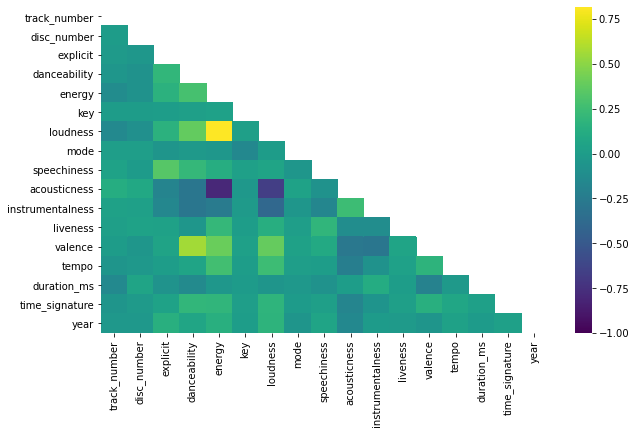

In [4]:
plt.figure(figsize=(10,6))
corr=track_df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

In [5]:
zerotoone = track_df[['acousticness','danceability','loudness','speechiness','energy','instrumentalness','liveness','valence','year']]
dataframe=zerotoone.copy()
dataframe_plot=dataframe[dataframe.year>1950]
#dataframe_plot=dataframe_plot.reset_index(drop==True)
dataframe_plot.set_index('year',inplace=True)

sns.set_style('whitegrid')
dataframe_plot.plot(figsize=(12,11),style='--')
sns.despine(left=True,bottom=True)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 864x792 with 1 Axes>

# Preprocess Dataframe

In [6]:
track_df[['artists','name']]

,artists,name
0,['Rage Against The Machine'],Testify
1,['Rage Against The Machine'],Guerrilla Radio
2,['Rage Against The Machine'],Calm Like a Bomb
3,['Rage Against The Machine'],Mic Check
4,['Rage Against The Machine'],Sleep Now In the Fire
...,...,...
1204020,['FVLCRVM'],Gospel of Juke
1204021,['FVLCRVM'],Prism Visions
1204022,['FVLCRVM'],Tokyo 360
1204023,['FVLCRVM'],Yummy!


In [7]:
def select_cols(df):
       return df[['artists','id','name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

track_dfp=select_cols(track_df)
track_dfp.head()

,artists,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,['Rage Against The Machine'],7lmeHLHBe4nmXzuXc0HDjk,Testify,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906
1,['Rage Against The Machine'],1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680
2,['Rage Against The Machine'],1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749
3,['Rage Against The Machine'],2lbASgTSoDO7MTuLAXlTW0,Mic Check,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752
4,['Rage Against The Machine'],1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059


# Clustering 

In [8]:
#Scaling Data 

from sklearn.preprocessing import StandardScaler 
def scale_data(dataframe):
    df=dataframe.select_dtypes(np.number)
    number_cols=list(df.columns)
    scaler=StandardScaler()
    scaled_x=scaler.fit_transform(df.values)
    scaled_df=pd.DataFrame(scaled_x,columns=df.columns)
    print(scaled_df.head())
    return scaled_df

scaled_df=scale_data(track_dfp)

   danceability    energy       key  loudness      mode  speechiness  \
0     -0.121562  1.589717  0.510599  0.918016  0.699495    -0.100716   
1      0.558569  1.518454  1.641587  0.865739  0.699495     0.893324   
2     -0.938773  1.562569  0.510599  0.914435  0.699495     3.436618   
3     -0.279732  1.552388  1.641587  0.856287 -1.429603     1.315769   
4     -0.353544  1.423437 -0.903137  0.727529  0.699495    -0.123132   

   acousticness  instrumentalness  liveness   valence     tempo  
0     -1.092029         -0.751691  0.855599  0.277330  0.008781  
1     -1.126297         -0.751533 -0.258227  0.225571 -0.451057  
2     -1.099039         -0.751715 -0.441094 -0.214381  1.038065  
3     -0.736631         -0.751711 -0.446636  0.539822 -0.674995  
4     -1.155581         -0.472676 -0.679930  0.410424  0.304640  


In [9]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca.fit(scaled_df)
pca_dfp=pca.transform(scaled_df)

# K-Means Clustering

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
#k-means - find number of clusters

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_dfp)
    cluster_labels = kmeans.labels_


KeyboardInterrupt: 

In [29]:
# silhouette score
silhouette_avg.append(silhouette_score(pca_dfp, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

KeyboardInterrupt: 

In [17]:
kmeans=KMeans(n_clusters=8 , verbose=2)
kmeans.fit(pca_dfp)

Initialization complete
Iteration 0, inertia 954520.7551016225
Iteration 1, inertia 835849.9888787995
Iteration 2, inertia 810722.9738744886
Iteration 3, inertia 799587.5453186168
Iteration 4, inertia 792283.517387356
Iteration 5, inertia 786733.4535667117
Iteration 6, inertia 782505.901904699
Iteration 7, inertia 779372.2449651937
Iteration 8, inertia 777171.761314129
Iteration 9, inertia 775618.1428376796
Iteration 10, inertia 774477.8409637666
Iteration 11, inertia 773617.1650440758
Iteration 12, inertia 772957.0938278437
Iteration 13, inertia 772422.4381362292
Iteration 14, inertia 771981.757583367
Iteration 15, inertia 771617.2077451552
Iteration 16, inertia 771298.1248613356
Iteration 17, inertia 771014.146635956
Iteration 18, inertia 770758.3870693591
Iteration 19, inertia 770523.803254052
Iteration 20, inertia 770301.6956369154
Iteration 21, inertia 770085.3179324497
Iteration 22, inertia 769885.9655637585
Iteration 23, inertia 769698.6762738666
Iteration 24, inertia 769524.793

Iteration 12, inertia 764286.6278679488
Iteration 13, inertia 764198.8608470033
Iteration 14, inertia 764136.1051250652
Converged at iteration 14: center shift 0.000199255344422004 within tolerance 0.0002298799599551265.
Initialization complete
Iteration 0, inertia 931313.4061237603
Iteration 1, inertia 797897.217144512
Iteration 2, inertia 772413.8205128557
Iteration 3, inertia 760335.4280202639
Iteration 4, inertia 752692.7289027233
Iteration 5, inertia 746630.6658952859
Iteration 6, inertia 741910.3391565271
Iteration 7, inertia 738637.9988115465
Iteration 8, inertia 736508.2014969799
Iteration 9, inertia 735217.6001461729
Iteration 10, inertia 734417.3825239319
Iteration 11, inertia 733893.6713298102
Iteration 12, inertia 733544.3214665351
Iteration 13, inertia 733303.0257321764
Iteration 14, inertia 733141.9294143716
Iteration 15, inertia 733025.9965225831
Iteration 16, inertia 732945.6117982852
Iteration 17, inertia 732888.6973525084
Iteration 18, inertia 732847.4794465841
Conver

Iteration 60, inertia 733106.0242755234
Converged at iteration 60: center shift 0.00021716754584738803 within tolerance 0.0002298799599551265.
Initialization complete
Iteration 0, inertia 899033.901575368
Iteration 1, inertia 777120.1357829418
Iteration 2, inertia 754315.5352546534
Iteration 3, inertia 746703.1623433642
Iteration 4, inertia 743492.1872501256
Iteration 5, inertia 741805.8106457349
Iteration 6, inertia 740791.1623644225
Iteration 7, inertia 740079.1038369554
Iteration 8, inertia 739525.6760577618
Iteration 9, inertia 739062.4059775223
Iteration 10, inertia 738640.1765507526
Iteration 11, inertia 738225.3968524804
Iteration 12, inertia 737794.0430991751
Iteration 13, inertia 737345.9045349311
Iteration 14, inertia 736891.6749938276
Iteration 15, inertia 736450.8399095156
Iteration 16, inertia 736028.8167171301
Iteration 17, inertia 735635.3718097585
Iteration 18, inertia 735274.0942845158
Iteration 19, inertia 734954.5652749027
Iteration 20, inertia 734677.3900569923
Iter

KMeans(verbose=2)

In [18]:
spotify_kmeans=track_dfp.copy()
spotify_kmeans['cluster_label']=kmeans.predict(pca_dfp)

# Density Based

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
dbscan=DBSCAN(eps=8,min_samples=4)
dbscan.fit(pca_dfp)

MemoryError: 

In [ ]:
spotify_dbscan=track.dfp.copy()
spotify_dbscan['cluster_label']=dbscan.predict(pca_dfp)

# Mini-Batch Kmeans Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minikmeans = MiniBatchKMeans(n_clusters=8,random_state=23,batch_size=32)
minikmeans.fit(pca_dfp)

In [ ]:
spotify_kmeans=track_dfp.copy()
spotify_kmeans['cluster_label']=minikmeans.predict(pca_dfp)

# Get User Data with Spotify API 

In [ ]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id='e894378a77d9492c85494e7a6e6b5b9a', client_secret='24243b151a524a1ab35e6284785e7d1e')
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope="playlist-modify-private", client_id='e894378a77d9492c85494e7a6e6b5b9a', client_secret='24243b151a524a1ab35e6284785e7d1e',redirect_uri="http://example.com"))

In [ ]:
#User Test Playlist 
playlist_link = "https://open.spotify.com/playlist/37i9dQZF1DWSqBruwoIXkA?si=1333723a6eff4b7f&nd=1"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"]for x in sp.playlist_tracks(playlist_URI)["items"]]

In [ ]:
artist_name=[]
track_url=[]
track_name=[]
danceability=[]
energy=[]
key=[]
loudness=[]
mode=[]
speechiness=[]
acousticness=[]
instrumentalness=[]
liveness=[]
valence=[]
tempo=[]

for track in sp.playlist_tracks(playlist_URI)["items"]:
    
    #Track 
    track_name.append(track["track"]["name"])
    track_id=track["track"]["id"]
    track_url.append(track["track"]["uri"])
    
    #Artist Name
    artist_name.append(track["track"]["artists"][0]["name"])
    
    #Track Attributes 
    track_af=sp.audio_features(track_id)
    danceability.append(track_af[0]['danceability'])
    energy.append(track_af[0]['energy'])
    key.append(track_af[0]['key'])
    loudness.append(track_af[0]['loudness'])
    mode.append(track_af[0]['mode'])
    speechiness.append(track_af[0]['speechiness'])
    acousticness.append(track_af[0]['acousticness'])
    instrumentalness.append(track_af[0]['instrumentalness'])
    liveness.append(track_af[0]['liveness'])
    valence.append(track_af[0]['valence'])
    tempo.append(track_af[0]['tempo'])


In [ ]:
track_dataframe = pd.DataFrame({'artists' : artist_name,'id':track_url,'name' : track_name, 'danceability' : danceability, 'energy' : energy, 'key' : key, 'loudness':loudness,'mode':mode,'speechiness':speechiness,'acousticness':acousticness,'instrumentalness':instrumentalness,'liveness':liveness,'valence':valence,'tempo':tempo})
print(track_dataframe.shape)
track_dataframe.to_csv("test_playlist.csv")
track_dataframe.head()

# Content Based Recommendation System

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
metadata_cols = ['artists','id','name']

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=8, 
                                   verbose=2))],verbose=True)
X = track_df[features]
song_cluster_pipeline.fit(X)


In [ ]:
def recommend(track_dataframe,track_df,n_songs=15):
    #tracks_groupby(track_dataframe)
    
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(track_df[features])
    scaled_dataframe=scaler.transform(track_dataframe[features])
    
    ed_dist = euclidean_distances(scaled_dataframe, scaled_data)
    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = track_df.iloc[index]
    
    return rec_output[metadata_cols]


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
recommend_playlist=(recommend(track_dataframe,track_df))
print(recommend_playlist)

# Add Playlist with Recommended Songs with Spotify API

In [ ]:
from datetime import date 
today=str(date.today())
user_id = "2253u5a76karakkhbubhrd2yq"
my_playlist = sp.user_playlist_create(user=f"{user_id}", name="New Playlist "+today, public=False,)
print(my_playlist)

In [ ]:
playlist_id_new=my_playlist["id"]
tracks=(recommend_playlist['id'])
for track in tracks:
    uri='spotify:track:'+track
    print(uri)
    sp.playlist_add_items(playlist_id=playlist_id_new, items=[uri],position=None)